In [23]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment4.ipynb")

# Otter-Grader Tutorial

This notebook is part of the Otter-Grader tutorial. For more information about Otter, see our [documentation](https://otter-grader.rtfd.io).

In [24]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp, poisson

%matplotlib inline
import otter
grader = otter.Notebook()

**Question 1:** Write a class `generic_descrete_png` that simulates random integers from any discrete distribution function. The class should accept inputs for the PMF, the size of the simulation array and any additional method arguments can be parsed in from the method itself:

For example, i should be able to call your class object and use the simulate method as:

```generic_descrete_png(binomial_pmf,1000).simulate(n = 10, p = 0.5)```

*Do not change or remove anything from the class below, only add !*

In [29]:
########. Distributions ########
import math

def binomial_pmf(n, p, x):
    return math.comb(n, x) * p**x * (1-p)**(n-x)

def bernoulli_pmf():
    return bernoulli.pmf()

def poison_pmf(x, **kwargs):
    return poisson.pmf(x,**kwargs )

np.random.seed(seed=2212)
class generic_descrete_png():
    def __init__(self, pmf, size):
        self.pmf = pmf
        self.size = size
    
    def discrete_cdf(self, x, **kwargs):
        """
        This is a generic discrete CDF which 
        takes the cumulat
        ive sum of a pmf
        """
        cdf  = 0
        for k in range(x):
            cdf += self.pmf(x=k, **kwargs)
        return cdf

    def get_probabilities(self, tol=10**(-5), **kwargs):
        """
        This function creates the probabilities needed from which to extract integers
        """
        pvec = []
        k=1
        cdf=0
        while (1-cdf) > tol and not math.isnan(cdf):
            cdf += self.discrete_cdf(x=k, **kwargs)
            pvec.append(cdf)
            k += 1 
        return pvec[:-1]
    
    def discrete_inv_transform_sample(self, p_vec):
        """
        This function searches over a uniform interval
        for a subsequent integer
        """
        p_vec = np.sort(p_vec)
        Uni = np.random.uniform(size=1)
        if Uni <= p_vec[0]:
            return 0
        for k in range(1, len(p_vec)):
            if Uni > p_vec[k-1] and Uni <= p_vec[k]:
                return k
        
    def simulate(self, **kwargs):
        """
        This function samples from any pmf parsed with
        key, values pairs (**kwargs)
        """
        samples = []
        p_vec = self.get_probabilities(tol=10**(-5), **kwargs)
        for i in range(self.size):
            realisation = self.discrete_inv_transform_sample(p_vec)
            while realisation is None:
                realisation = self.discrete_inv_transform_sample(p_vec)
            samples.append(realisation)
        return samples
        

In [30]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** Given the following target distribution
$$f(x|\alpha, \beta) = \frac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}$$

$$\text{where} \ \ \ \ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)},\ \text{and}\ \Gamma\ \text{is a}$$ [gamma function](https://en.wikipedia.org/wiki/Gamma_function)

i. Write a function to simulate $n$ values that follow a beta ($\alpha = 2.7, \beta = 6.3$) distribution using the accept-reject algorithm. Use a beta ($\alpha = 2, \beta = 6$) as your proposal distribution and $c=1.67$ as your $c$. Please note you're allowed to use ```scipy.stats.beta.rvs``` to simulate from your proposal.

_Once again please don't change existing code, just add on to it_

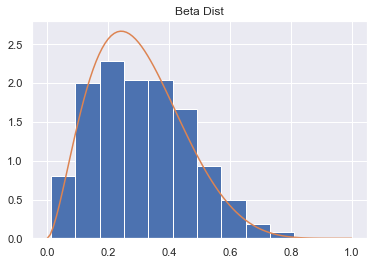

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
import seaborn as sns
sns.set()
np.random.seed(523)

def f_target(x):
    a = 2.7
    b = 6.3
    beta = gamma(a) * gamma(b) /gamma(a + b)
    p = x ** (a - 1) * (1-x) ** (b - 1)
    return 1/beta * p

c = 1.67

def beta_simulate(n):
    i = 0
    outputs = np.zeros(n)
    while i < n:
        U = np.random.uniform(size=1)
        V = np.random.uniform(size=1)
        if U < f_target(V)/c:
            outputs[i] = V
            i += 1
    return outputs

px = np.arange(0,1+0.01,0.01)
py = f_target(px)

Y = beta_simulate(n = 1000)
fig,ax = plt.subplots()
temp = ax.hist(Y,density=True)
ax.plot(px,py)
plt.title("Beta Dist")
plt.show()




In [12]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3:** Using the sales data, write code to group the data by Manager and Region. Then compute the average Units, maximum unit price and minimum sale amount per manager per region. Ensure you reset your index so that your result looks similar to the data below.

| Manager   | Region   |   Units |   Unit_price |   Sale_amt |
|:----------|:---------|--------:|-------------:|-----------:|
| Douglas   | Central  | 52      |         1198 |        250 |
| Douglas   | East     | 56.6667 |          500 |       3375 |
...
| Timothy   | West     | 35.5    |         1198 |        375 |

In [13]:
df = pd.read_csv('data/sales.csv', delimiter=";")

q3 = df.groupby(['Manager','Region']).agg({'Units':np.mean,'Unit_price':max,'Sale_amt':min })
q3_result = q3.reset_index()
q3_result

,Manager,Region,Units,Unit_price,Sale_amt
0,Douglas,Central,52.000000,1198.0,250.0
1,Douglas,East,56.666667,500.0,3375.0
2,Douglas,West,44.500000,1198.0,28500.0
3,Hermann,Central,53.916667,1198.0,625.0
4,Marth,Central,28.000000,500.0,14000.0
5,Martha,Central,51.666667,1198.0,16772.0
6,Martha,East,52.100000,1198.0,936.0
7,Timothy,Central,42.600000,1198.0,6075.0
8,Timothy,West,35.500000,1198.0,375.0


In [14]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** Write a Pandas program to create a Pivot table and find the total sale amount region wise, manager wise, sales man wise where Manager = "Douglas". 

In [15]:
df = pd.read_csv('data/sales.csv', delimiter=";")

q4 = pd.pivot_table(df, index=['Region','Manager','SalesMan'], values='Sale_amt')
q4_result = q4.query('Manager == ["Douglas"]')
q4_result

,,,Sale_amt
Region,Manager,SalesMan,
Central,Douglas,John,41338.666667
East,Douglas,Karen,16068.000000
West,Douglas,Michael,33418.000000


In [16]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5:** Write a Pandas program to Combine two DataFrame objects by filling null values in one DataFrame with non-null values from other DataFrame.

_Test Data:_

Original DataFrames:
```
     A  B
0  NaN  3
1  0.0  4
2  NaN  5
```

```
   A    B
0  1  3.0
1  1  NaN
2  3  3.0
```

In [17]:

df1 = pd.DataFrame({'A': [None, 0, None], 'B': [3, 4, 5]})
df2 = pd.DataFrame({'A': [1, 1, 3], 'B': [3, None, 3]})
# combine the dataframes
q5_result = df1.combine_first(df2)
q5_result

,A,B
0,1.0,3
1,0.0,4
2,3.0,5


In [18]:
grader.check("q5")

q5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)